# Proyecto final : entrenamiento de un modelo de regresión lineal univariado con gradiente en descenso
Por: Rodrigo Chang

Carné: 19000625
## Carga y partición de datos
### Cargar el conjunto de datos

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression

In [38]:
data = np.load("proyecto_training_data.npy")
data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [39]:
# Ver la dimensión de los datos
data.shape

(1460, 6)

### Partición del conjunto de entrenamiento y pruebas

In [40]:
# Cantidad de datos y regresoras
OBS, NVAR = data.shape
(OBS, NVAR)

# Dividir el conjunto de datos
TRAINOBS = int(OBS*0.8)

# Conjunto de datos de entrenamiento
Ytrain = data[:TRAINOBS, 0]
Xtrain = data[:TRAINOBS, 1:]
print("Entrenamiento: ", Ytrain.shape, Xtrain.shape)

# Conjunto de datos de validación y pruebas
Ytest = data[TRAINOBS:, 0]
Xtest = data[TRAINOBS:, 1:]
print("Prueba: ", Ytest.shape, Xtest.shape)

Entrenamiento:  (1168,) (1168, 5)
Prueba:  (292,) (292, 5)


In [41]:
# Obteniendo algunos valores de prueba
Ytrain[len(Ytrain)-1], Ytest[0]

(173000.0, 235000.0)

In [42]:
# Obteniendo algunos valores de prueba
Xtrain[-1,], Xtest[0]

(array([   6.,  959.,    7., 2000.,   58.]),
 array([   6., 1236.,    7., 1935.,  120.]))

In [43]:
# Número de columnas de X
Xtrain.shape[1]

5

## Análisis exploratorio de datos

In [44]:
def basicStats(x):
    '''
    Esta función devuelve las estadísticas básicas sobre un vector de numpy
    '''
    minVal = np.nanmin(x)
    maxVal = np.nanmax(x)
    meanVal = np.nanmean(x)
    sdVal = np.nanstd(x)
    print("Mínimo:\t%0.2f\nMínimo:\t%0.2f\nRango:\t%0.2f\nMedia:\t%0.2f\nDesviación:\t%0.2f\n" % (minVal, maxVal, maxVal-minVal, meanVal, sdVal))
    return minVal, maxVal, maxVal-minVal, meanVal, sdVal

In [45]:
# Algunas estadísticas para la respuesta
print("Estadísticas para Y:")
basicStats(Ytrain);
for i in range(Xtrain.shape[1]):
    print("Estadísticas para X%i:" % (i+1))
    basicStats(Xtrain[:, i])


#seaborn.distplot(Ytrain)

Estadísticas para Y:
Mínimo:	34900.00
Mínimo:	755000.00
Rango:	720100.00
Media:	180590.28
Desviación:	78781.95

Estadísticas para X1:
Mínimo:	1.00
Mínimo:	10.00
Rango:	9.00
Media:	6.10
Desviación:	1.38

Estadísticas para X2:
Mínimo:	334.00
Mínimo:	3228.00
Rango:	2894.00
Media:	1156.32
Desviación:	373.62

Estadísticas para X3:
Mínimo:	2.00
Mínimo:	14.00
Rango:	12.00
Media:	6.49
Desviación:	1.61

Estadísticas para X4:
Mínimo:	1875.00
Mínimo:	2010.00
Rango:	135.00
Media:	1971.45
Desviación:	29.94

Estadísticas para X5:
Mínimo:	21.00
Mínimo:	313.00
Rango:	292.00
Media:	69.95
Desviación:	23.47



### Histogramas de las variables

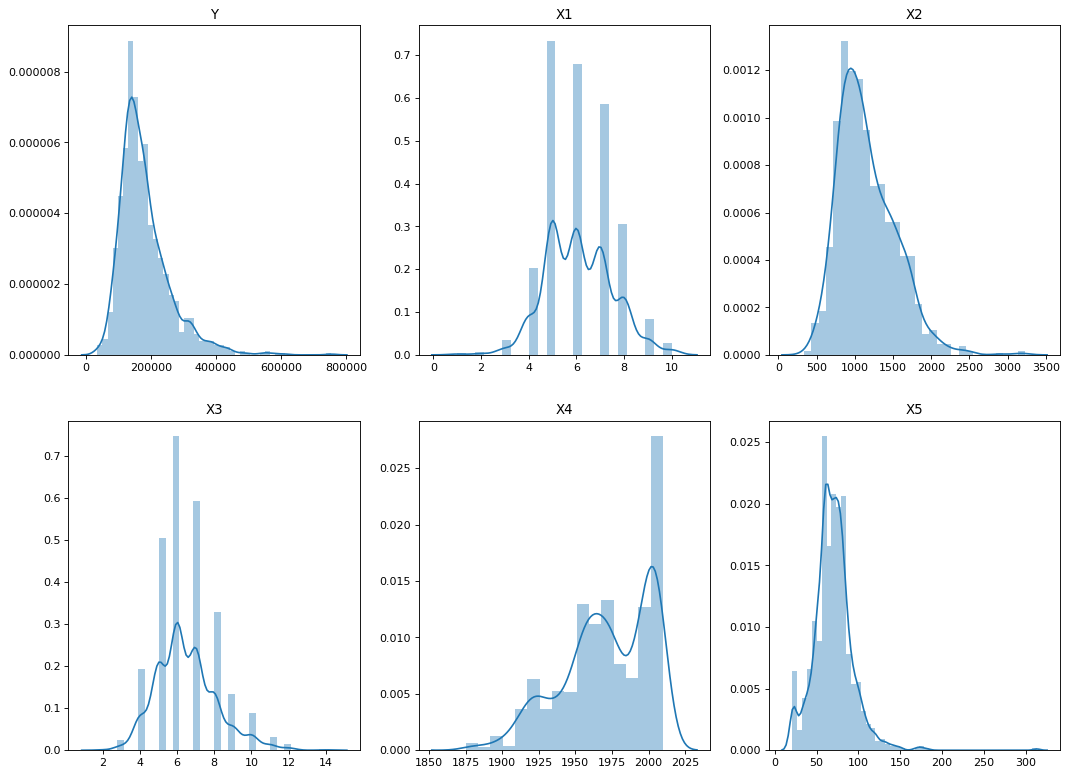

In [46]:
# Gráficas de histogramas de las variables
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2,3,1)
plt.title("Y")
seaborn.distplot(Ytrain)

for i in range(Xtrain.shape[1]):
    # Configurar el axes
    plt.subplot(2,3,i+2)
    plt.title("X%i" % (i+1))
    # Graficar el histograma
    # Quitar observaciones con NaNs de las variables
    s = np.isnan(Xtrain[:, i])
    seaborn.distplot(Xtrain[~s, i])

In [47]:
# Ejemplo para obtener el coeficiente de correlación
np.corrcoef(Xtrain[:,0], Ytrain)[0,1]

0.7939900504626408

### Gráficas de puntos de las variables para analizar la correlación

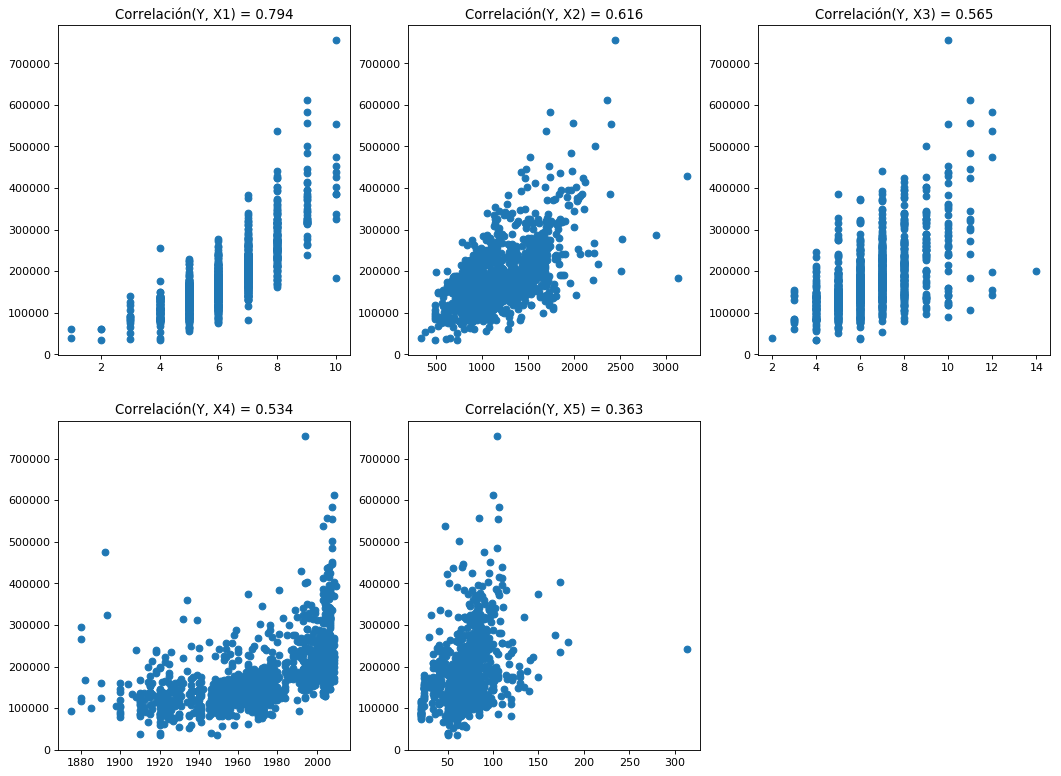

In [48]:
# Nubes de puntos de las variables para analizar la correlación
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')

for i in range(Xtrain.shape[1]):
    # Quitar observaciones con NaNs de las variables
    s = np.isnan(Xtrain[:, i])
    # Computar la correlación
    corr = np.corrcoef(Xtrain[~s, i], Ytrain[~s])[0,1]
    # Graficar la nube de puntos
    plt.subplot(2,3,i+1)
    plt.title("Correlación(Y, X%i) = %0.3f" %(i+1, corr))
    plt.scatter(Xtrain[~s, i], Ytrain[~s])

**Análisis de correlación:** de acuerdo con las gráficas, podríamos escoger la regresora $X_1$ (OverallQual) como variable independiente para explicar el precio de las viviendas, así como a la variable $X_2$ (1stFlrSF), pues también posee una correlación alta con la variable dependiente.

### Creación de funciones para entrenar modelo de regresión lineal de una variable

In [49]:
def entrenarModeloLineal(x, y, epochs, imprimir_error_cada, lr):
    '''
    Función para entrenar un modelo de regresión lineal de una variable independiente.
    La función de costo se minimiza de forma iterativa, actualizando los parámetros del modelo a través
    del gradiente negativo.
    La funcón de costo se imprime cada 'imprimir_error_cada'
    La "tasa de aprendizaje" o "learning rate" es lr
    '''
    # Inicializar el vector de parámetros
    theta = np.array([1., 0.])
    
    # Estructuras para trayectoria de errores y parámetros del modelo
    modeloDic = {}
    costo_tray = np.zeros(epochs)
    
    # Para cada epoch...
    for i in range(epochs):
        # Calcular yhat = m*X + b (vectorizado)
        yhat = predecir(theta, x)

        # Calcular la función de costo
        costo_tray[i] = funcionCosto(yhat, y)
        
        # Imprimir error
        if (i % imprimir_error_cada == 0):
            print("Iteración %i,\tcosto = %0.2f" % (i+1, costo_tray[i]))
        
        # Cómputo de los gradientes
        grad  = np.array([ np.mean((yhat - y)*x), np.mean((y - yhat)) ])
        #print("Gradiente: ", grad)
        
        # Actualizar los parámetros del modelo
        theta -= lr * grad
        
        # Guardar los resultados del modelo
        modeloDic[i] = theta.copy()
        
    
    return modeloDic, costo_tray

def predecir(theta, x):
    '''
    Función utilizada para predecir yhat a partir de un vector theta de parámetros
    '''
    unos = np.ones_like(x)
    return np.matmul(theta, np.vstack((x, unos)))

def funcionCosto(yhat, y):
    '''
    Función utilizada para computar el costo utilizando las observaciones y los valores pronosticados
    '''
    return 0.5 * np.mean((yhat - y)**2)


### Gráficas de errores del modelo y nube de puntos

In [50]:
# Cómo cambia el error en el tiempo
def graficarError(costo_tray):
    fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(costo_tray)
    plt.title("Función de costo")
    plt.xlabel("Número de iteraciones")

In [51]:
# Para graficar el modelo de regresión lineal
def graficarModelo(x, y, modeloDic, n):
    fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(x, y)
    plt.title("Gráfica de modelos en función del número de iteración.")
    plt.ylabel("Precio de las viviendas")
    
    # Cantidad de modelos
    l = max(list(modeloDic.keys()))
    for i in range(0, l+1, n):
        yhat = predecir(modeloDic[i], x)
        plt.plot(x, yhat)
        plt.annotate("n = %d" % (i), (np.max(x), predecir(modeloDic[i], np.max(x))))
    


## Entrenamiento de modelos
### Entrenamiento utilizando la regresora X1

In [52]:
# Entrenamiento del modelo
modeloX1, costo_tray = entrenarModeloLineal(Xtrain[:,0], Ytrain, 100, 10, 0.001)

Iteración 1,	costo = 19408534125.11
Iteración 11,	costo = 9642337262.70
Iteración 21,	costo = 5158135949.90
Iteración 31,	costo = 3099250472.30
Iteración 41,	costo = 2153989032.72
Iteración 51,	costo = 1720066621.07
Iteración 61,	costo = 1520934101.27
Iteración 71,	costo = 1429609357.97
Iteración 81,	costo = 1387786450.20
Iteración 91,	costo = 1368693239.72


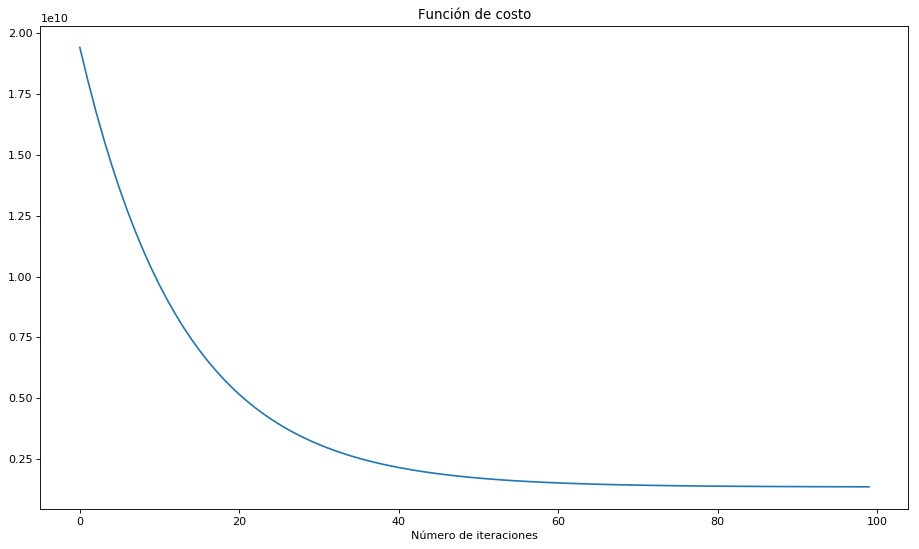

In [53]:
# Gráfica del modelo en el tiempo
graficarError(costo_tray)

Text(0.5, 0, 'X1 : OverallQual')

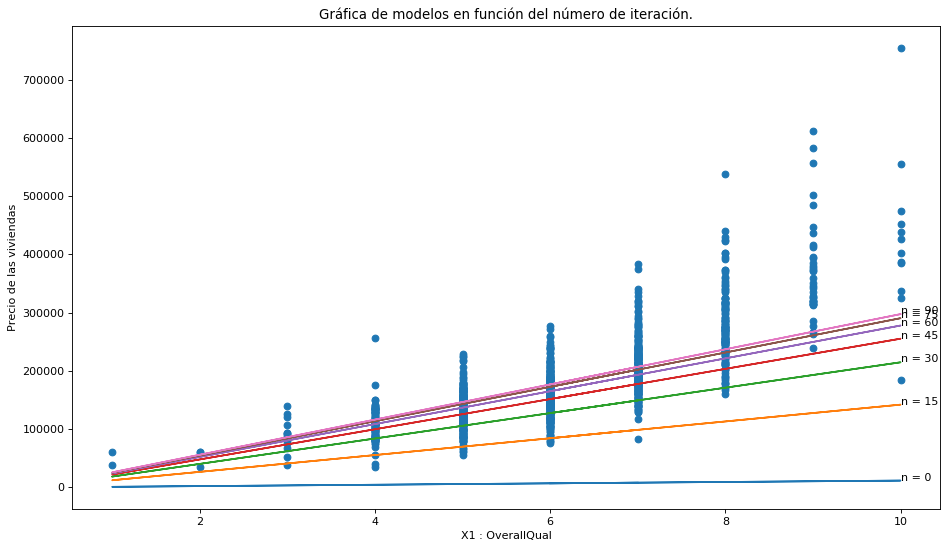

In [54]:
# Graficamos la función de costo
graficarModelo(Xtrain[:, 0], Ytrain, modeloX1, 15)
plt.xlabel('X1 : OverallQual')

In [55]:
# Obteniendo los últimos parámetros estimados
modeloX1[99]

array([30434.75836985, -4294.87734501])

### Entrenamiento utilizando la regresora X2

In [56]:
# Entrenamiento del modelo
modeloX2, costo_tray = entrenarModeloLineal(Xtrain[:,1], Ytrain, 100, 9, 0.00000003)

Iteración 1,	costo = 19183499412.76
Iteración 10,	costo = 9583684919.62
Iteración 19,	costo = 5337008207.90
Iteración 28,	costo = 3458402834.84
Iteración 37,	costo = 2627362851.26
Iteración 46,	costo = 2259735108.40
Iteración 55,	costo = 2097107365.56
Iteración 64,	costo = 2025165617.41
Iteración 73,	costo = 1993340696.74
Iteración 82,	costo = 1979262285.36
Iteración 91,	costo = 1973034409.82
Iteración 100,	costo = 1970279381.36


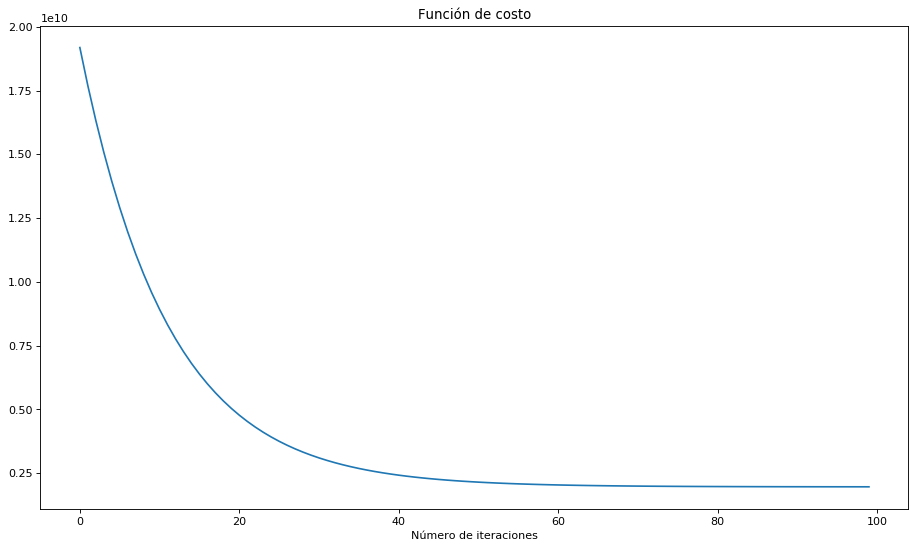

In [57]:
# Gráfica del modelo en el tiempo
graficarError(costo_tray)

Text(0.5, 0, 'X2 : 1stFlrSF')

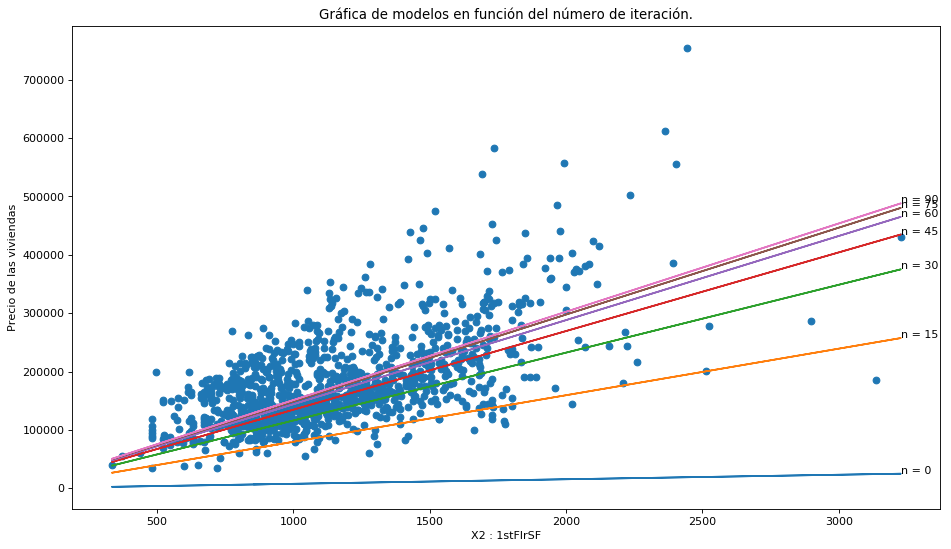

In [58]:
# Graficamos la función de costo
graficarModelo(Xtrain[:, 1], Ytrain, modeloX2, 15)
plt.xlabel('X2 : 1stFlrSF')

In [59]:
modeloX2[99]

array([ 1.52052969e+02, -1.26883161e-01])

## Utilizando *scikit-learn* para entrenar el modelo de regresión lineal
### Modelo para X1

In [60]:
# Entrenamiento de modelo para X1
regX1 = LinearRegression().fit(Xtrain[:, 0].reshape(-1, 1), Ytrain)
regX1.coef_, regX1.intercept_

(array([45411.99877916]), -96469.57131873936)

### Modelo para X2

In [61]:
# Entrenamiento de modelo para X2
regX2 = LinearRegression().fit(Xtrain[:, 1].reshape(-1, 1), Ytrain)
regX2.coef_, regX2.intercept_

(array([129.95124229]), 30324.585174963693)

In [62]:
# Parar acceder al valor del coeficiente 
regX2.coef_[0]

129.95124228715713

### Función para obtener una predicción combinada de modelos 

In [63]:
def predCombModelos(modeloDic, sciLinearReg, x):
    # Generar predicción manual
    l = max(list(modeloDic.keys()))
    yhatManual = predecir(modeloDic[l], x)
    
    # Generar predicción del objeto LinearRegression
    thetaSci = np.array([sciLinearReg.coef_[0], sciLinearReg.intercept_])
    yhatSci = predecir(thetaSci, x)
    
    # Combinación de predicciones
    yhatProm = (yhatManual + yhatSci) / 2
    
    return yhatManual, yhatSci, yhatProm


### Obteniendo el costo de los modelos para cada regresora utilizada

In [64]:
# Función de costo para el modelo 1, generado manual y por scikit-learn, y promedio.
yhatManual1, yhatSci1, yhatProm1 = predCombModelos(modeloX1, regX1, Xtest[:, 0])
costoModelosX1 = [funcionCosto(yhatManual1, Ytest), funcionCosto(yhatSci1, Ytest),  funcionCosto(yhatProm1, Ytest)]
costoModelosX1

[1537914271.018729, 1315091304.4743195, 1371228007.260375]

In [65]:
# Función de costo para el modelo 2, generado manual y por scikit-learn, y promedio.
yhatManual2, yhatSci2, yhatProm2 = predCombModelos(modeloX2, regX2, Xtest[:, 1])
costoModelosX2 = [funcionCosto(yhatManual2, Ytest), funcionCosto(yhatSci2, Ytest),  funcionCosto(yhatProm2, Ytest)]
costoModelosX2

[2425531594.1217923, 2292769137.345937, 2345624808.0622478]

### Gráficas de barras comparativas

(1, 3000000000.0)

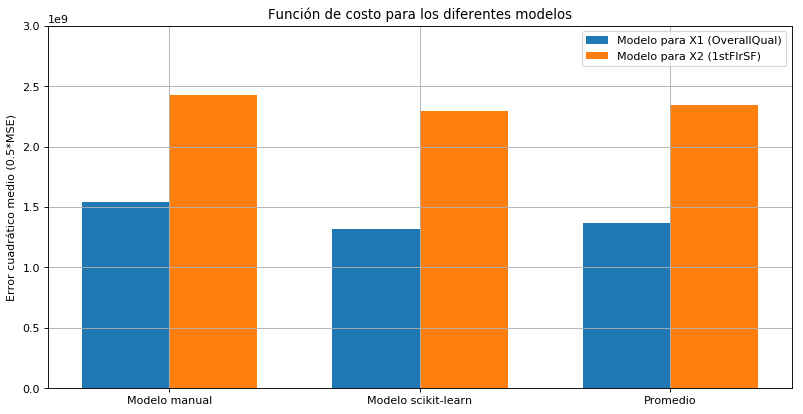

In [66]:
width = 0.35;
centers = np.array([1,2,3])

fig = plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes()

# Etiquetas de ejes
plt.title('Función de costo para los diferentes modelos')
plt.ylabel('Error cuadrático medio (0.5*MSE)')

# Poner las etiquetas horizontales
ax.set_xticks(centers)
ax.set_xticklabels(('Modelo manual','Modelo scikit-learn', 'Promedio'))

# Gráfica de barras
ax.grid()
ax.bar(centers-width/2, costoModelosX1, width, label='Modelo para X1 (OverallQual)')
ax.bar(centers+width/2, costoModelosX2, width, label='Modelo para X2 (1stFlrSF)')
ax.legend()

# Límite vertical
ax.set_ylim((1, 3e9))


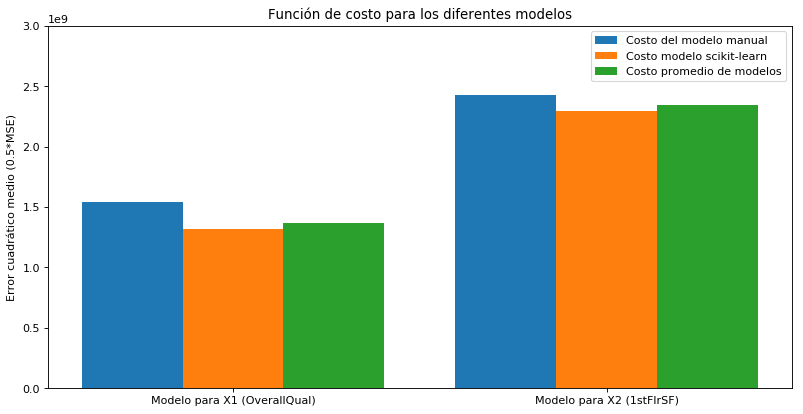

In [67]:
width = 0.27;
centers = np.array([1,2])

costoManual = [costoModelosX1[0], costoModelosX2[0]]
costoScikit = [costoModelosX1[1], costoModelosX2[1]]
costoProm = [costoModelosX1[2], costoModelosX2[2]]

fig = plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes()

# Etiquetas de ejes
plt.title('Función de costo para los diferentes modelos')
plt.ylabel('Error cuadrático medio (0.5*MSE)')

# Poner las etiquetas horizontales
ax.set_xticks(centers)
ax.set_xticklabels(('Modelo para X1 (OverallQual)','Modelo para X2 (1stFlrSF)'))

# Gráfica de barras
#ax.grid()
ax.bar(centers - width, costoManual, width, label='Costo del modelo manual')
ax.bar(centers, costoScikit, width, label='Costo modelo scikit-learn')
ax.bar(centers + width, costoProm, width, label='Costo promedio de modelos')
ax.legend()

# Límite vertical
ax.set_ylim((1, 3e9));

## Conclusión acerca de los modelos

De acuerdo con la información gráfica presentada acerca de las funciones de costo, tanto para la variable X1 (*OverallQual*) y para la variable X2 (*1stFlrSF*), los modelos entrenados con la función de *scikit-learn* proporcionan un mejor desempeño (menor error) sobre el conjunto de datos de prueba.

Finalmente, como las medidas de error están obtenidas sobre el conjunto de prueba, se podría decir que la mejor variable explicativa para pronosticar el precio de las viviendas es la variable X1 (OverallQual), pues genera menores medidas de error sobre el conjunto de datos no visto por el algoritmo de entrenamiento.